In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sbn

In [2]:
data = pd.read_excel("merc.xlsx")

In [3]:
data.head()

,year,price,transmission,mileage,tax,mpg,engineSize
0,2005,5200,Automatic,63000,325,32.1,1.8
1,2017,34948,Automatic,27000,20,61.4,2.1
2,2016,49948,Automatic,6200,555,28.0,5.5
3,2016,61948,Automatic,16000,325,30.4,4.0
4,2016,73948,Automatic,4000,325,30.1,4.0


In [4]:
data.isnull().sum()

year            0
price           0
transmission    0
mileage         0
tax             0
mpg             0
engineSize      0
dtype: int64

C:\Users\kamar\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

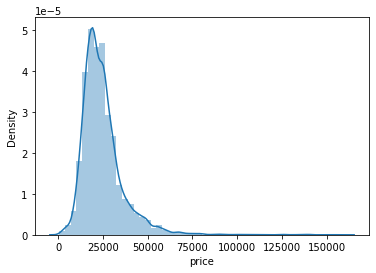

In [5]:
sbn.distplot(data["price"])

C:\Users\kamar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='year', ylabel='count'>

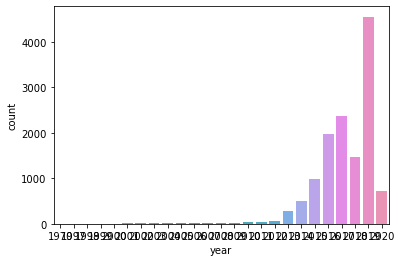

In [6]:
sbn.countplot(data["year"])

In [7]:
data.corr()

,year,price,mileage,tax,mpg,engineSize
year,1.000000,0.520712,-0.738027,0.012480,-0.094626,-0.142147
price,0.520712,1.000000,-0.537214,0.268717,-0.438445,0.516126
mileage,-0.738027,-0.537214,1.000000,-0.160223,0.202850,0.063652
tax,0.012480,0.268717,-0.160223,1.000000,-0.513742,0.338341
mpg,-0.094626,-0.438445,0.202850,-0.513742,1.000000,-0.339862
engineSize,-0.142147,0.516126,0.063652,0.338341,-0.339862,1.000000


In [8]:
data.corr()["price"].sort_values()

mileage      -0.537214
mpg          -0.438445
tax           0.268717
engineSize    0.516126
year          0.520712
price         1.000000
Name: price, dtype: float64

<AxesSubplot:xlabel='mileage', ylabel='price'>

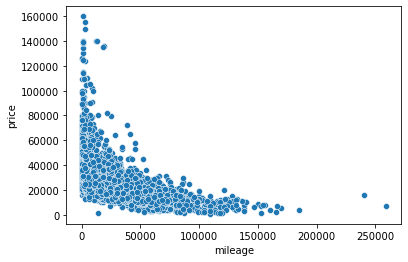

In [9]:
sbn.scatterplot(x="mileage",y="price",data=data)

In [10]:
data.sort_values("price",ascending = False).head(20)

,year,price,transmission,mileage,tax,mpg,engineSize
6199,2020,159999,Semi-Auto,1350,145,21.4,4.0
10044,2020,154998,Automatic,3000,150,21.4,4.0
5,2011,149948,Automatic,3000,570,21.4,6.2
8737,2019,140319,Semi-Auto,785,150,22.1,4.0
6386,2018,139995,Semi-Auto,13046,145,21.4,4.0
8,2019,139948,Automatic,12000,145,21.4,4.0
9133,2019,139559,Semi-Auto,1000,145,22.1,4.0
8821,2020,138439,Semi-Auto,1000,145,22.1,4.0
5902,2018,135771,Semi-Auto,19000,145,21.4,4.0
7864,2018,135124,Semi-Auto,18234,150,21.4,4.0


In [11]:
#pahalılar veriyi biraz bozuyor.

In [12]:
len(data)

13119

In [13]:
len(data)*0.01

131.19

In [14]:
#131 tane en pahalı arabayı atacağız

In [15]:
yeni_Df = data.sort_values("price", ascending = False).iloc[131:]

In [17]:
yeni_Df.describe()

,year,price,mileage,tax,mpg,engineSize
count,12988.000000,12988.000000,12988.000000,12988.000000,12988.000000,12988.000000
mean,2017.281876,24074.926933,22132.741146,129.689714,55.437142,2.050901
std,2.228515,9866.224575,21196.776401,65.183076,15.025999,0.532596
min,1970.000000,650.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,17357.500000,6322.000000,125.000000,45.600000,1.675000
50%,2018.000000,22299.000000,15369.500000,145.000000,56.500000,2.000000
75%,2019.000000,28706.000000,31982.250000,145.000000,64.200000,2.100000
max,2020.000000,65990.000000,259000.000000,580.000000,217.300000,6.200000


C:\Users\kamar\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

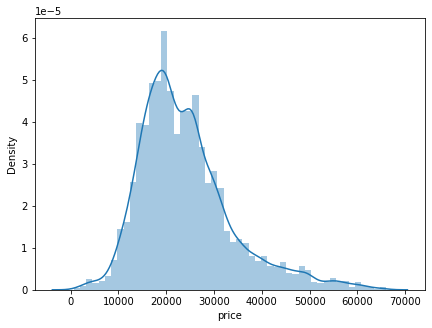

In [18]:
plt.figure(figsize=(7,5))
sbn.distplot(yeni_Df["price"])

In [19]:
data.groupby("year").mean()["price"]
#veriye baktığımızda 1970 gereksiz pahalı bu yüzden çıkarabiliriz

year
1970    24999.000000
1997     9995.000000
1998     8605.000000
1999     5995.000000
2000     5743.333333
2001     4957.900000
2002     5820.444444
2003     4878.000000
2004     4727.615385
2005     4426.111111
2006     4036.875000
2007     5136.045455
2008     6967.437500
2009     6166.764706
2010     8308.473684
2011    12624.894737
2012    10845.140351
2013    11939.842466
2014    14042.936864
2015    16731.780020
2016    19307.892948
2017    21514.307854
2018    25720.162918
2019    31290.020865
2020    35433.282337
Name: price, dtype: float64

In [20]:
data[data.year != 1970].groupby("year").mean()["price"]

year
1997     9995.000000
1998     8605.000000
1999     5995.000000
2000     5743.333333
2001     4957.900000
2002     5820.444444
2003     4878.000000
2004     4727.615385
2005     4426.111111
2006     4036.875000
2007     5136.045455
2008     6967.437500
2009     6166.764706
2010     8308.473684
2011    12624.894737
2012    10845.140351
2013    11939.842466
2014    14042.936864
2015    16731.780020
2016    19307.892948
2017    21514.307854
2018    25720.162918
2019    31290.020865
2020    35433.282337
Name: price, dtype: float64

In [21]:
data = yeni_Df

In [22]:
data = data[data.year != 1970]

In [23]:
data.groupby("year").mean()["price"]

year
1997     9995.000000
1998     8605.000000
1999     5995.000000
2000     5743.333333
2001     4957.900000
2002     5820.444444
2003     4878.000000
2004     4727.615385
2005     4426.111111
2006     4036.875000
2007     5136.045455
2008     6967.437500
2009     6166.764706
2010     8308.473684
2011     8913.459459
2012    10845.140351
2013    11939.842466
2014    14042.936864
2015    16647.822222
2016    19223.558943
2017    21356.280421
2018    24800.844506
2019    30289.524832
2020    34234.794872
Name: price, dtype: float64

In [24]:
data.head()
#regresyon yapacağımız sırada tüm veriler nümerik olmalı bu yüzden transmission sütununu çıkarmalıyız

,year,price,transmission,mileage,tax,mpg,engineSize
6177,2019,65990,Semi-Auto,5076,150,30.4,3.0
5779,2020,65990,Semi-Auto,999,145,28.0,4.0
3191,2020,65980,Semi-Auto,3999,145,28.0,4.0
4727,2019,65000,Semi-Auto,3398,145,27.2,4.0
8814,2019,64999,Semi-Auto,119,145,40.9,3.0


In [27]:
data = data.drop("transmission",axis=1)

In [28]:
y = data["price"].values
x = data.drop("price", axis=1).values

In [29]:
from sklearn.model_selection import train_test_split


In [30]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=10)

In [31]:
len(x_train)

9090

In [32]:
len(x_test)

3897

In [33]:
from sklearn.preprocessing import MinMaxScaler

In [34]:
sc = MinMaxScaler()

In [36]:
x_train = sc.fit_transform(x_train)

In [37]:
x_test = sc.transform(x_test)

In [38]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [40]:
x_train.shape

(9090, 5)

In [42]:
model = Sequential()

model.add(Dense(12,activation="relu"))
model.add(Dense(12,activation="relu"))
model.add(Dense(12,activation="relu"))
model.add(Dense(12,activation="relu"))

model.add(Dense(1))

model.compile(optimizer="adam",loss="mse")

In [43]:
model.fit(x=x_train, y=y_train, validation_data=(x_test,y_test),batch_size=250,epochs=300)

Epoch 1/300
37/37 [==============================] - 3s 9ms/step - loss: 672136576.0000 - val_loss: 688080320.0000
Epoch 2/300
37/37 [==============================] - 0s 5ms/step - loss: 672055424.0000 - val_loss: 687915520.0000
Epoch 3/300
37/37 [==============================] - 0s 5ms/step - loss: 671734656.0000 - val_loss: 687336704.0000
Epoch 4/300
37/37 [==============================] - 0s 5ms/step - loss: 670722880.0000 - val_loss: 685645824.0000
Epoch 5/300
37/37 [==============================] - 0s 4ms/step - loss: 668022016.0000 - val_loss: 681441280.0000
Epoch 6/300
37/37 [==============================] - 0s 4ms/step - loss: 661753536.0000 - val_loss: 672161152.0000
Epoch 7/300
37/37 [==============================] - 0s 4ms/step - loss: 648772864.0000 - val_loss: 653998144.0000
Epoch 8/300
37/37 [==============================] - 0s 4ms/step - loss: 624707392.0000 - val_loss: 622074816.0000
Epoch 9/300
37/37 [==============================] - 0s 4ms/step - loss: 5846629

37/37 [==============================] - 0s 4ms/step - loss: 60712932.0000 - val_loss: 62214136.0000
Epoch 73/300
37/37 [==============================] - 0s 5ms/step - loss: 60072224.0000 - val_loss: 61611712.0000
Epoch 74/300
37/37 [==============================] - 0s 4ms/step - loss: 59429248.0000 - val_loss: 60957796.0000
Epoch 75/300
37/37 [==============================] - 0s 4ms/step - loss: 58808268.0000 - val_loss: 60283880.0000
Epoch 76/300
37/37 [==============================] - 0s 4ms/step - loss: 58111624.0000 - val_loss: 59605716.0000
Epoch 77/300
37/37 [==============================] - 0s 4ms/step - loss: 57425264.0000 - val_loss: 58951280.0000
Epoch 78/300
37/37 [==============================] - 0s 4ms/step - loss: 56747664.0000 - val_loss: 58288332.0000
Epoch 79/300
37/37 [==============================] - 0s 4ms/step - loss: 56037472.0000 - val_loss: 57532476.0000
Epoch 80/300
37/37 [==============================] - 0s 4ms/step - loss: 55325824.0000 - val_loss: 5

37/37 [==============================] - 0s 4ms/step - loss: 22811216.0000 - val_loss: 23874230.0000
Epoch 144/300
37/37 [==============================] - 0s 4ms/step - loss: 22688268.0000 - val_loss: 23773078.0000
Epoch 145/300
37/37 [==============================] - 0s 4ms/step - loss: 22565184.0000 - val_loss: 23642120.0000
Epoch 146/300
37/37 [==============================] - 0s 4ms/step - loss: 22455174.0000 - val_loss: 23545430.0000
Epoch 147/300
37/37 [==============================] - 0s 4ms/step - loss: 22370554.0000 - val_loss: 23443410.0000
Epoch 148/300
37/37 [==============================] - 0s 4ms/step - loss: 22261432.0000 - val_loss: 23387726.0000
Epoch 149/300
37/37 [==============================] - 0s 4ms/step - loss: 22149656.0000 - val_loss: 23270106.0000
Epoch 150/300
37/37 [==============================] - 0s 4ms/step - loss: 22038322.0000 - val_loss: 23249420.0000
Epoch 151/300
37/37 [==============================] - 0s 4ms/step - loss: 21996238.0000 - val

37/37 [==============================] - 0s 4ms/step - loss: 19828842.0000 - val_loss: 21206294.0000
Epoch 215/300
37/37 [==============================] - 0s 4ms/step - loss: 19788470.0000 - val_loss: 21183238.0000
Epoch 216/300
37/37 [==============================] - 0s 4ms/step - loss: 19763282.0000 - val_loss: 21205304.0000
Epoch 217/300
37/37 [==============================] - 0s 4ms/step - loss: 19751700.0000 - val_loss: 21122352.0000
Epoch 218/300
37/37 [==============================] - 0s 4ms/step - loss: 19716152.0000 - val_loss: 21106694.0000
Epoch 219/300
37/37 [==============================] - 0s 4ms/step - loss: 19689060.0000 - val_loss: 21079984.0000
Epoch 220/300
37/37 [==============================] - 0s 4ms/step - loss: 19658400.0000 - val_loss: 21067036.0000
Epoch 221/300
37/37 [==============================] - 0s 4ms/step - loss: 19640466.0000 - val_loss: 21056596.0000
Epoch 222/300
37/37 [==============================] - 0s 4ms/step - loss: 19632420.0000 - val

37/37 [==============================] - 0s 4ms/step - loss: 18610350.0000 - val_loss: 20111184.0000
Epoch 286/300
37/37 [==============================] - 0s 4ms/step - loss: 18568932.0000 - val_loss: 20164314.0000
Epoch 287/300
37/37 [==============================] - 0s 4ms/step - loss: 18592826.0000 - val_loss: 20093348.0000
Epoch 288/300
37/37 [==============================] - 0s 4ms/step - loss: 18559296.0000 - val_loss: 20089094.0000
Epoch 289/300
37/37 [==============================] - 0s 4ms/step - loss: 18563376.0000 - val_loss: 20064378.0000
Epoch 290/300
37/37 [==============================] - 0s 4ms/step - loss: 18545384.0000 - val_loss: 20105686.0000
Epoch 291/300
37/37 [==============================] - 0s 4ms/step - loss: 18536772.0000 - val_loss: 20044522.0000
Epoch 292/300
37/37 [==============================] - 0s 4ms/step - loss: 18548494.0000 - val_loss: 20035576.0000
Epoch 293/300
37/37 [==============================] - 0s 4ms/step - loss: 18519746.0000 - val

In [44]:
loss_data=pd.DataFrame(model.history.history)

In [45]:
loss_data.head()

,loss,val_loss
0,672136576.0,688080320.0
1,672055424.0,687915520.0
2,671734656.0,687336704.0
3,670722880.0,685645824.0
4,668022016.0,681441280.0


<AxesSubplot:>

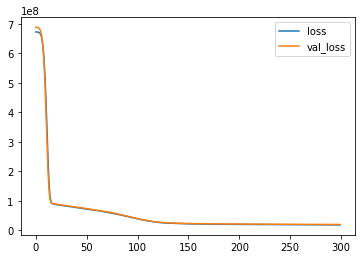

In [46]:
loss_data.plot()

In [47]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [48]:
predict = model.predict(x_test)

122/122 [==============================] - 0s 2ms/step


In [49]:
predict

array([[22008.746],
       [23018.957],
       [25058.736],
       ...,
       [26379.543],
       [13639.688],
       [24774.777]], dtype=float32)

In [50]:
mean_absolute_error(y_test,predict)

3178.7566033241715

In [51]:
data.describe()


,year,price,mileage,tax,mpg,engineSize
count,12987.000000,12987.000000,12987.000000,12987.000000,12987.000000,12987.000000
mean,2017.285516,24074.855779,22133.367367,129.676215,55.438392,2.051059
std,2.189633,9866.601115,21197.472376,65.167429,15.025902,0.532313
min,1997.000000,650.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,17355.000000,6320.000000,125.000000,45.600000,1.700000
50%,2018.000000,22299.000000,15371.000000,145.000000,56.500000,2.000000
75%,2019.000000,28706.000000,31986.500000,145.000000,64.200000,2.100000
max,2020.000000,65990.000000,259000.000000,580.000000,217.300000,6.200000


In [52]:
#price'ın ortalama değerine baktığımızda tahmin değerimizde %13'lük bir fark var. 

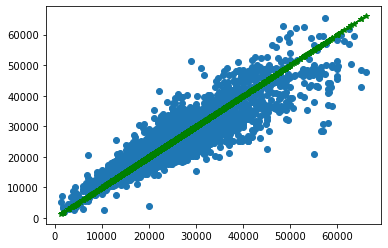

In [53]:
plt.scatter(y_test,predict)
plt.plot(y_test,y_test,"g-*")

In [54]:
data.iloc[2
         ]

year           2020.0
price         65980.0
mileage        3999.0
tax             145.0
mpg              28.0
engineSize        4.0
Name: 3191, dtype: float64

In [57]:
yeniaraba=data.drop("price",axis=1).iloc[2]

In [58]:
yeniaraba

year          2020.0
mileage       3999.0
tax            145.0
mpg             28.0
engineSize       4.0
Name: 3191, dtype: float64

In [59]:
yeniaraba=sc.transform(yeniaraba.values.reshape(-1,5))

In [61]:
model.predict(yeniaraba)

1/1 [==============================] - 0s 20ms/step


array([[60655.46]], dtype=float32)